# 📰 Fake News Detection using NLP & Machine Learning
#👩‍💻 By Shrawani Gulkari

# ---

## 🔍 1. Problem Statement
We aim to classify news articles as Fake or Real using NLP preprocessing and Machine Learning models.

# ---

## 📂 2. Dataset
- Source: [Fake and Real News Dataset](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)
- Total articles: 44,000+
- Columns: `title`, `text`, `subject`, `date`, `label`

# ---

## 📊 3. Exploratory Data Analysis
- Count of fake vs real
- Word count distribution
- Word Cloud

# ---

## 🧼 4. Text Preprocessing
- Lowercasing
- Removing stopwords
- Lemmatization using NLTK

# ---

## 🔠 5. TF-IDF Vectorization
Used TF-IDF to convert cleaned text into numerical features (top 5000 words).

# ---

## 🤖 6. Model Training
- Logistic Regression: 98% accuracy
- Random Forest: 99% accuracy
- XGBoost : 99% accuracy

# ---

## 📈 7. Model Comparison
F1 Score, Precision, and Recall were evaluated. XGBoost selected for best balance.

# ---

## 🚀 8. Deployment
Deployed as a Streamlit Web App using saved model (`joblib`) and cleaned pipeline.

# ---

## 💡 9. Conclusion
Simple models perform well on TF-IDF features. Further improvements with BERT or scraping real-time news.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
import pandas as pd

fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
real = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')


print(fake.head())
print(real.head())

fake['label'] = 0
real['label'] = 1

df = pd.concat([fake, real], ignore_index=True)

df = df.sample(frac=1).reset_index(drop=True)

# Preview
print(df.shape)
df.head()

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

,title,text,subject,date,label
0,Death toll from blasts in Somalia's capital Mo...,MOGADISHU (Reuters) - More than 200 people wer...,worldnews,"October 15, 2017",1
1,CNN CUTS FEED Of GOP Rep Scott Taylor When He ...,CNN is notorious for cutting the mic when they...,politics,"Jul 16, 2017",0
2,WINE SIPPING City Attorney Caught On Camera Ta...,Police have identified Duncan Lloyd as the sus...,left-news,"Dec 1, 2016",0
3,Conservatives Desperately Turn To Social Medi...,"Early Sunday morning, Omar Mateen walked into ...",News,"June 12, 2016",0
4,Trump Supporters Force RNC To Close Conventio...,Poor GOPers looking forward to participating i...,News,"July 18, 2016",0


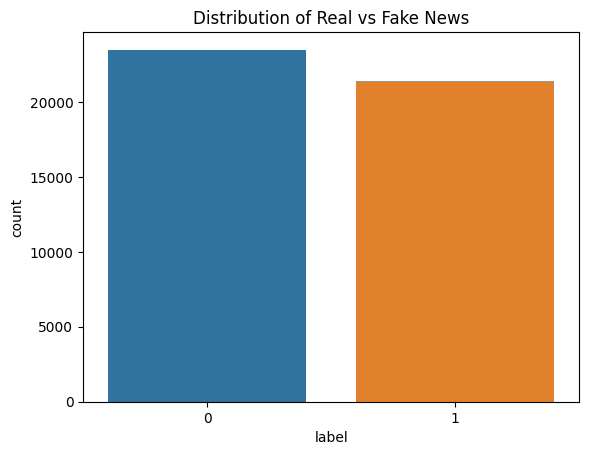

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

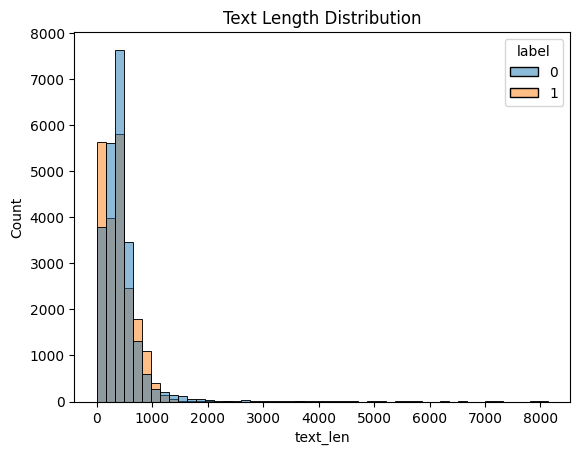

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of labels
sns.countplot(x='label', data=df)
plt.title('Distribution of Real vs Fake News')
plt.show()

# Add a column for text length
df['text_len'] = df['text'].apply(lambda x: len(str(x).split()))

# Plot text length
sns.histplot(data=df, x='text_len', hue='label', bins=50)
plt.title('Text Length Distribution')
plt.show()


In [4]:
#Text Cleaning and Preprocessing
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'\W', ' ', text)  # remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces
    tokens = nltk.word_tokenize(text)  # tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply to the text column (this takes a little time)
df['clean_text'] = df['text'].apply(clean_text)

# Preview cleaned text
df[['text', 'clean_text']].head()


,text,clean_text
0,MOGADISHU (Reuters) - More than 200 people wer...,mogadishu reuters 200 people killed twin bomb ...
1,CNN is notorious for cutting the mic when they...,cnn notorious cutting mic like someone saying ...
2,Police have identified Duncan Lloyd as the sus...,police identified duncan lloyd suspect recent ...
3,"Early Sunday morning, Omar Mateen walked into ...",early sunday morning omar mateen walked gay ni...
4,Poor GOPers looking forward to participating i...,poor gopers looking forward participating conv...


In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Use Kaggle's preloaded nltk data — no download needed
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'\W', ' ', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    tokens = word_tokenize(text)  # tokenize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply to dataset
df['clean_text'] = df['text'].apply(clean_text)

# Preview cleaned text
df[['text', 'clean_text']].head()


,text,clean_text
0,MOGADISHU (Reuters) - More than 200 people wer...,mogadishu reuters 200 people killed twin bomb ...
1,CNN is notorious for cutting the mic when they...,cnn notorious cutting mic like someone saying ...
2,Police have identified Duncan Lloyd as the sus...,police identified duncan lloyd suspect recent ...
3,"Early Sunday morning, Omar Mateen walked into ...",early sunday morning omar mateen walked gay ni...
4,Poor GOPers looking forward to participating i...,poor gopers looking forward participating conv...


In [6]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # limit to top 5000 words

# Fit and transform on cleaned text
X = tfidf.fit_transform(df['clean_text']).toarray()

# Target label
y = df['label']


In [8]:
import joblib
joblib.dump(tfidf, 'tfidf.pkl')


['tfidf.pkl']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
#Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("📊 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


📊 Logistic Regression Results
Accuracy: 0.9864142538975501
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4689
           1       0.98      0.99      0.99      4291

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [13]:
#Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("📊 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


📊 Random Forest Results
Accuracy: 0.9981069042316258
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4689
           1       1.00      1.00      1.00      4291

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [32]:
#XGBoost
import xgboost as xgb

# 1. Create model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 2. Train model on TF-IDF data
xgb_model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = xgb_model.predict(X_test)

# 4. Evaluate accuracy
accuracy_score(y_test, y_pred)


0.9971046770601336

In [33]:
import joblib
joblib.dump(rf_model, 'model.pkl')


['model.pkl']

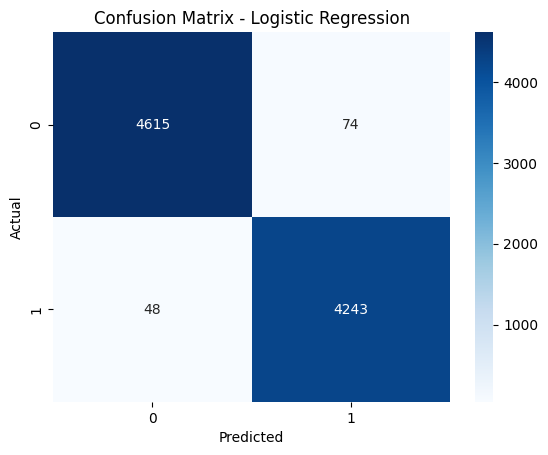

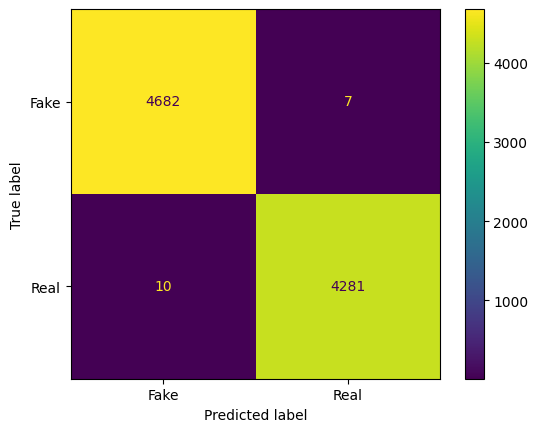

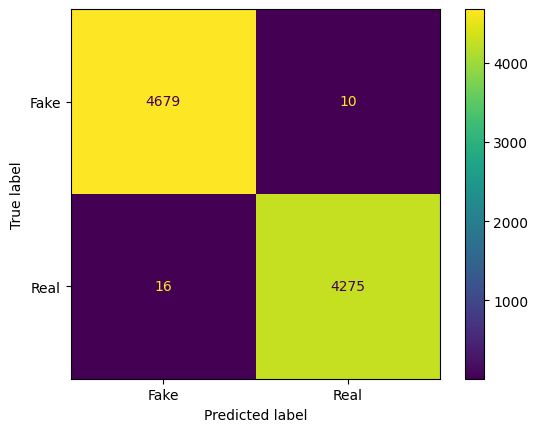

In [34]:
#Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For Random Forest
cm_rf = confusion_matrix(y_test, rf_model.predict(X_test))
ConfusionMatrixDisplay(cm_rf, display_labels=['Fake', 'Real']).plot()

# For XGBoost
cm_xgb = confusion_matrix(y_test, xgb_model.predict(X_test))
ConfusionMatrixDisplay(cm_xgb, display_labels=['Fake', 'Real']).plot()



In [35]:
#Model Comparison
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Results:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))



📊 Logistic Regression Results:
Accuracy : 0.9864142538975501
Precision: 0.9828584665276813
Recall   : 0.9888137963178746
F1 Score : 0.9858271375464683

📊 Random Forest Results:
Accuracy : 0.9981069042316258
Precision: 0.9983675373134329
Recall   : 0.9976695408995572
F1 Score : 0.9980184170649259

📊 XGBoost Results:
Accuracy : 0.9971046770601336
Precision: 0.9976662777129521
Recall   : 0.9962712654392916
F1 Score : 0.9969682835820896
